In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
df = pd.read_csv('/content/winequality-red.csv') ##you need to use your own link here

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#check if any feature has null values
for feature in df.columns:
  print("{} has {} null values".format(feature,df[feature].isna().sum()))

fixed acidity has 0 null values
volatile acidity has 0 null values
citric acid has 0 null values
residual sugar has 0 null values
chlorides has 0 null values
free sulfur dioxide has 0 null values
total sulfur dioxide has 0 null values
density has 0 null values
pH has 0 null values
sulphates has 0 null values
alcohol has 0 null values
quality has 0 null values


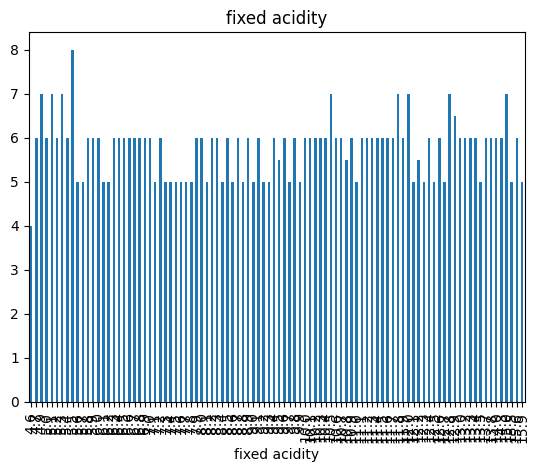

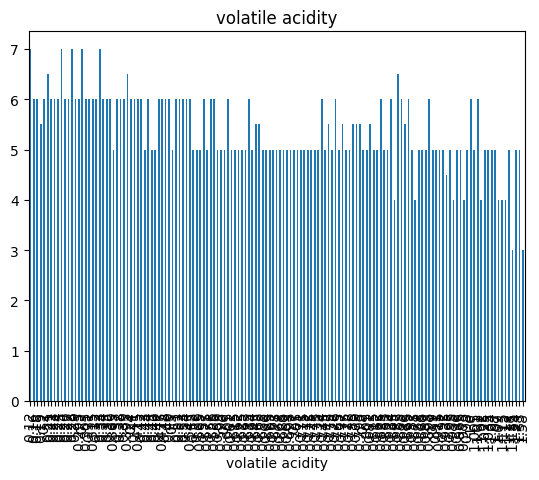

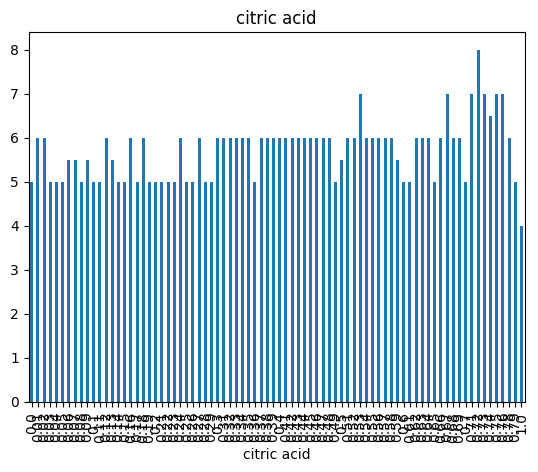

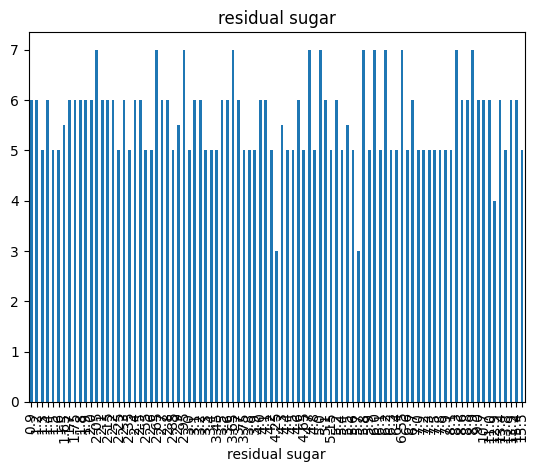

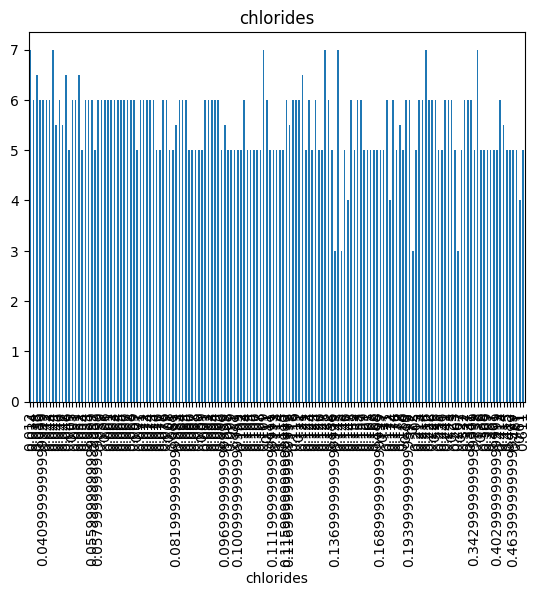

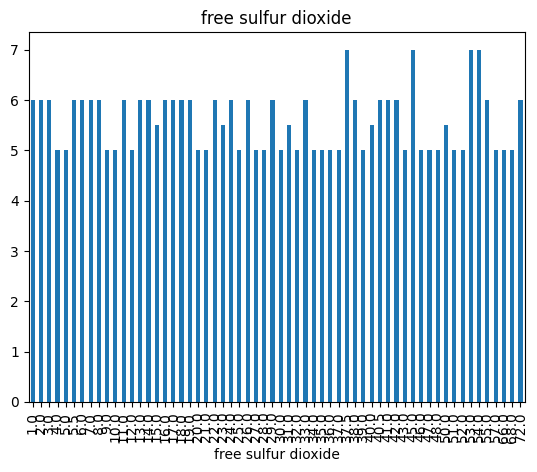

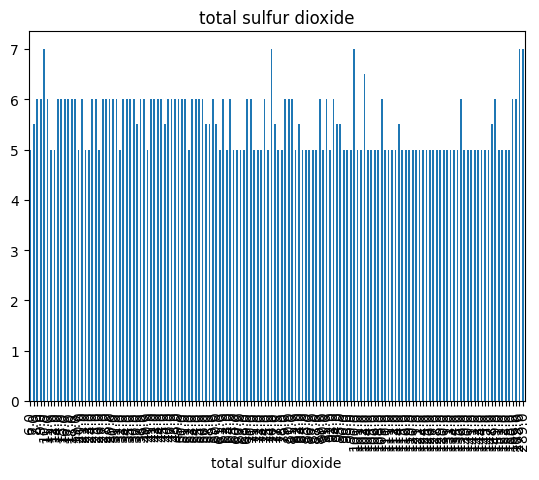

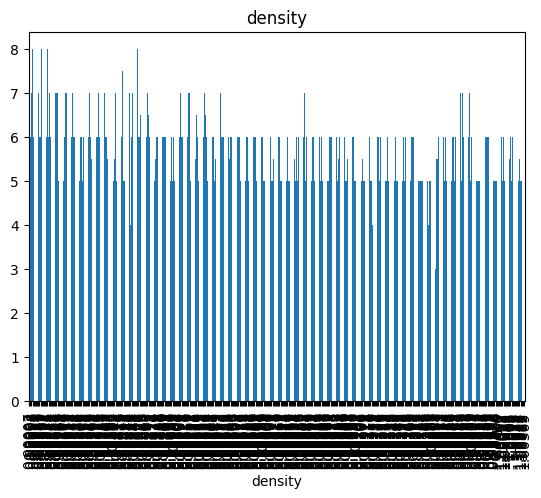

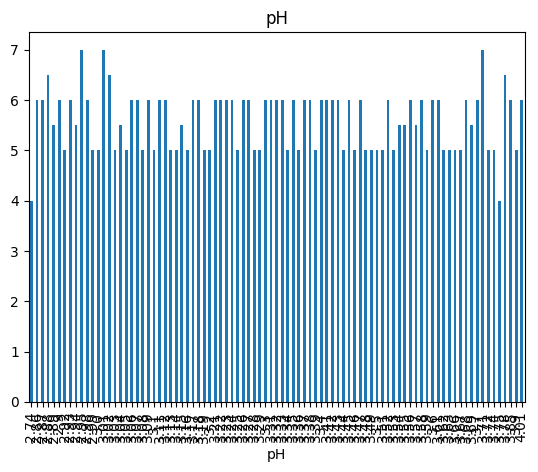

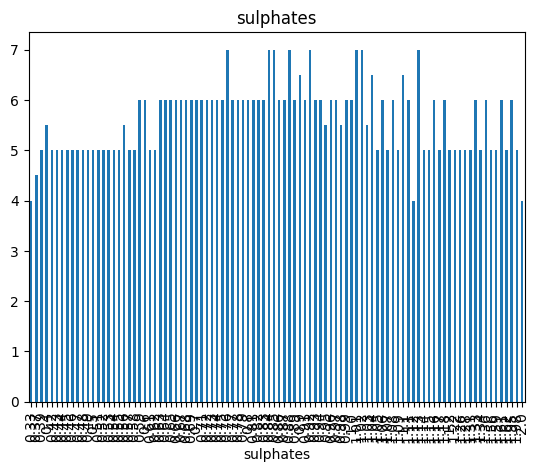

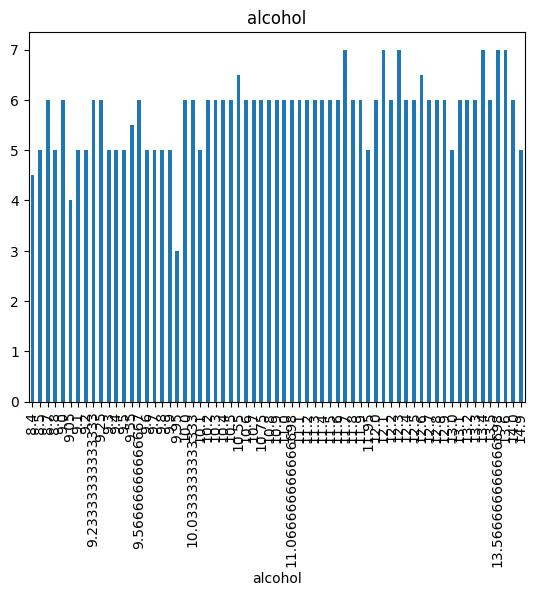

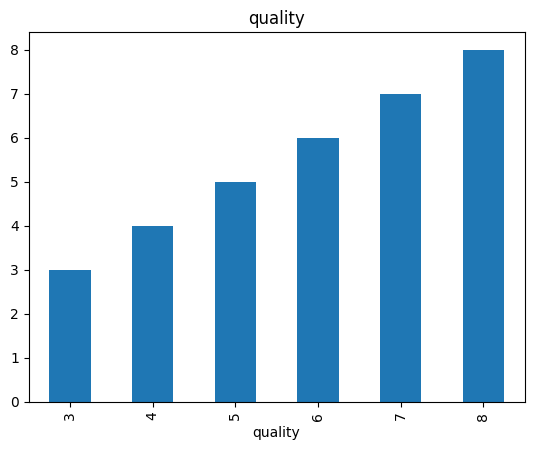

In [5]:
for feature in df.columns:
  data = df.copy()

  data.groupby(feature)['quality'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [6]:
#create dependent and independent features
X = df.drop('quality',axis=1)
y = df['quality']

In [7]:
len(X),len(y)

(1599, 1599)

In [9]:
X.shape, y.shape

((1599, 11), (1599,))

In [17]:
#let's normalize and standardize the data
def standardizeData(features):
  from sklearn.preprocessing import MinMaxScaler
  scalar = MinMaxScaler()
  scalar.fit(features)
  scalar.transform(features)
  data = pd.concat([pd.DataFrame(scalar.transform(features), columns=features.columns)], axis=1)

  return data

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
len(X_train),len(X_test)

(1199, 400)

In [18]:
X_train = standardizeData(X_train)
X_test = standardizeData(X_test)

In [19]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.628319,0.253425,0.49,0.089041,0.118531,0.059701,0.031802,0.729075,0.354331,0.036810,0.123077
1,0.371681,0.328767,0.29,0.089041,0.143573,0.059701,0.031802,0.640969,0.488189,0.073620,0.107692
2,0.221239,0.321918,0.00,0.082192,0.131886,0.119403,0.028269,0.353157,0.535433,0.110429,0.476923
3,0.327434,0.287671,0.24,0.171233,0.106845,0.223881,0.374558,0.552863,0.417323,0.147239,0.153846
4,0.415929,0.448630,0.27,0.130137,0.110184,0.343284,0.176678,0.611601,0.448819,0.184049,0.338462
...,...,...,...,...,...,...,...,...,...,...,...
1194,0.398230,0.328767,0.00,0.068493,0.076795,0.059701,0.014134,0.560206,0.346457,0.159509,0.307692
1195,0.318584,0.352740,0.10,0.082192,0.101836,0.358209,0.190813,0.463289,0.433071,0.233129,0.384615
1196,0.230088,0.342466,0.06,0.123288,0.108514,0.208955,0.279152,0.542584,0.606299,0.104294,0.169231
1197,0.292035,0.054795,0.35,0.054795,0.070117,0.089552,0.031802,0.331131,0.456693,0.263804,0.538462


In [20]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.257143,0.442211,0.101266,0.091549,0.176471,0.183099,0.143911,0.488751,0.330435,0.320388,0.214286
1,0.266667,0.381910,0.215190,0.028169,0.101176,0.281690,0.350554,0.403413,0.460870,0.145631,0.196429
2,0.542857,0.552764,0.278481,0.105634,0.160000,0.225352,0.099631,0.744763,0.365217,0.631068,0.267857
3,0.333333,0.341709,0.392405,0.073944,0.091765,0.436620,0.188192,0.558573,0.408696,0.203883,0.250000
4,0.161905,0.341709,0.303797,0.035211,0.089412,0.239437,0.099631,0.310318,0.460870,0.262136,0.392857
...,...,...,...,...,...,...,...,...,...,...,...
395,0.161905,0.552764,0.025316,0.049296,0.051765,0.352113,0.129151,0.317300,0.460870,0.475728,0.446429
396,0.504762,0.321608,0.632911,0.232394,0.160000,0.056338,0.022140,0.558573,0.365217,0.485437,0.553571
397,0.200000,0.482412,0.000000,0.042254,0.082353,0.211268,0.099631,0.496509,0.530435,0.359223,0.267857
398,0.266667,0.502513,0.063291,0.077465,0.094118,0.070423,0.040590,0.508146,0.373913,0.291262,0.160714


In [21]:
#set random seed
tf.random.set_seed(42)

#create a model
qualityPredictor = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model
qualityPredictor.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=['mae'])

#fit the model
qualityPredictor.fit(X_train,y_train,epochs=150)

Epoch 1/150
38/38 [==============================] - 1s 3ms/step - loss: 1.4723 - mae: 1.4723
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 0.6384 - mae: 0.6384
Epoch 3/150
38/38 [==============================] - 0s 2ms/step - loss: 0.5780 - mae: 0.5780
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 0.6006 - mae: 0.6006
Epoch 5/150
38/38 [==============================] - 0s 2ms/step - loss: 0.5505 - mae: 0.5505
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5539 - mae: 0.5539
Epoch 7/150
38/38 [==============================] - 0s 2ms/step - loss: 0.5537 - mae: 0.5537
Epoch 8/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5327 - mae: 0.5327
Epoch 9/150
38/38 [==============================] - 0s 2ms/step - loss: 0.5855 - mae: 0.5855
Epoch 10/150
38/38 [==============================] - 0s 2ms/step - loss: 0.5290 - mae: 0.5290
Epoch 11/150
38/38 [==============================] - 0s 2m

In [22]:
predictions = qualityPredictor.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [23]:
predictions

array([[ 5.024528 ],
       [ 5.036823 ],
       [ 5.024528 ],
       [ 6.0045915],
       [ 6.0343227],
       [ 5.024528 ],
       [ 5.024528 ],
       [ 5.040047 ],
       [ 6.018458 ],
       [ 6.026378 ],
       [ 6.745937 ],
       [ 5.1300783],
       [ 5.2673745],
       [ 5.024528 ],
       [ 5.9757433],
       [ 5.5701694],
       [ 5.0233502],
       [ 6.0103292],
       [ 6.6488643],
       [ 5.1192303],
       [ 5.0187435],
       [ 5.024528 ],
       [ 6.3264527],
       [ 6.6047473],
       [ 5.024528 ],
       [ 5.024528 ],
       [ 6.8741612],
       [ 5.584856 ],
       [ 5.024528 ],
       [ 6.26028  ],
       [ 5.024025 ],
       [ 5.036925 ],
       [ 6.0351534],
       [ 5.036466 ],
       [ 5.024528 ],
       [ 5.0357785],
       [ 6.3500705],
       [ 6.830051 ],
       [ 6.0142145],
       [ 6.023252 ],
       [ 5.8909154],
       [ 5.0292816],
       [ 6.957801 ],
       [ 5.114248 ],
       [ 5.024528 ],
       [ 5.4082303],
       [ 6.462386 ],
       [ 6.00

In [25]:
predictions = tf.math.round(predictions)

In [26]:
predictions

<tf.Tensor: shape=(400, 1), dtype=float32, numpy=
array([[ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 5.],
       [ 5.],
       [ 7.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 7.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 6.],
       [10.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 4.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 7.],
       [ 6.],
       [ 6.],
       [ 5.]

In [29]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64

In [32]:
y_test.dtype

dtype('int64')

In [33]:
predictions = tf.cast(predictions,dtype=y_test.dtype)

In [37]:
predictions

<tf.Tensor: shape=(400, 1), dtype=int64, numpy=
array([[ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 5],
       [ 6],
       [ 7],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 7],
       [ 5],
       [ 5],
       [ 7],
       [ 6],
       [ 5],
       [ 6],
       [ 5],
       [ 5],
       [ 6],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 7],
       [ 6],
       [ 6],
       [ 6],
       [ 5],
       [ 7],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 5],
       [ 6],
       [ 5],
       [ 5],
       [ 6],
       [10],
       [ 5],
       [ 5],
       [ 6],
       [ 4],
       [ 6],
       [ 5],
       [ 6],
       [ 6],
       [ 5],
       [ 5],
       [ 7],
       [ 6],
       [ 6],
       [ 5],
       [ 7],
       [ 5],
       [ 6],
       [ 5],
       [ 6],
   

In [39]:
tf.squeeze(predictions)

<tf.Tensor: shape=(400,), dtype=int64, numpy=
array([ 5,  5,  5,  6,  6,  5,  5,  5,  6,  6,  7,  5,  5,  5,  6,  6,  5,
        6,  7,  5,  5,  5,  6,  7,  5,  5,  7,  6,  5,  6,  5,  5,  6,  5,
        5,  5,  6,  7,  6,  6,  6,  5,  7,  5,  5,  5,  6,  6,  5,  6,  5,
        5,  6, 10,  5,  5,  6,  4,  6,  5,  6,  6,  5,  5,  7,  6,  6,  5,
        7,  5,  6,  5,  6,  6,  6,  5,  9,  6,  7,  7,  6,  7,  5,  6,  6,
        6,  5,  7,  6,  5,  6,  5,  6,  6,  5,  6,  5,  6,  5,  6,  5,  5,
        6,  6,  5,  6,  6,  5,  6,  5,  8,  5,  6,  5,  6,  7,  8,  6,  5,
        6,  7,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  5,  5,  6,  6,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  5,  5,  7,  5,  6,  5,  6,  6,  5,
        6,  6,  6,  5,  6,  6,  6,  7,  6,  6,  5,  5,  6,  5,  5,  5,  5,
        5,  5,  6,  5,  7,  6,  6,  5,  6,  5,  5,  7,  5,  6,  5,  6,  5,
        6,  6,  5,  5,  6,  6,  6,  6,  5,  5,  6,  5,  6,  6,  7,  5,  5,
        7,  6,  5,  6,  6,  6, 11,  5,  6,  6,  5,  6,

In [41]:
tf.constant(y_test)

<tf.Tensor: shape=(400,), dtype=int64, numpy=
array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
     